In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [209]:
train=pd.read_csv('/content/drive/My Drive/usaid/Train.csv')
sd=pd.read_csv('/content/drive/My Drive/usaid/service_delivery_site_data.csv')
submission=pd.read_csv('/content/drive/My Drive/usaid/SampleSubmission.csv')
monthly_cases = pd.read_csv('/content/drive/My Drive/usaid/monthly_cases.csv')
products = pd.read_csv('/content/drive/My Drive/usaid/product.csv')

In [ ]:
print(train.shape,submission.shape,sd.shape, monthly_cases.shape,products.shape)

(35753, 14) (3089, 2) (156, 6) (678, 28) (11, 3)


In [ ]:
products.head()

,product_code,product_type,product_name
0,AS17005,Female Condom,PRESERVATIF FEMININ UNITE
1,AS46000,Male Condom,PRESERVATIF MASCULIN BTE/144 BOITE
2,AS27139,Emergency Contraceptive (Pill),LEVONORGESTREL 1.5 MG CP BOITE
3,AS27137,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE
4,AS27138,Contraceptive Implant,IMPLANON IMPLANT 68 MG BTE/1 BOITE


In [ ]:
train.head(3)

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0


In [ ]:
monthly_cases.head(3)

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,34.0,NaN,NaN,NaN,75.0,44.0,1082.0,2542.0,NaN,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,19.0,9.0,1.0,1.0,66.0,38.0,813.0,557.0,20.0,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,26.0,NaN,5.0,5.0,47.0,42.0,819.0,665.0,50.0,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0


In [ ]:
sd.head(3)

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450


In [ ]:
train.drop(columns={'stock_initial', 'stock_received','stock_adjustment', 
                    'stock_end','average_monthly_consumption',
                    'stock_stockout_days', 'stock_ordered'},inplace=True)

In [ ]:
test=pd.DataFrame(submission.ID.str.split('X',3).tolist(), columns = ['year','month','site_code','product_code'])


for col in test.columns:
    test[col] = test[col].str.strip()
column=['year','month'] 
for col in column:
    test[col]=test[col].astype(int)
test=pd.merge(test,sd,on='site_code',how='left')
test.rename(columns={'site_region':'region','site_district':'district'},inplace=True)
test=test[['year', 'month', 'region','district','site_code', 'product_code']]

In [ ]:
test.head(3)

,year,month,region,district,site_code,product_code
0,2019,7,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS21126
1,2019,7,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134
2,2019,7,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132


In [ ]:
train.head(2).append(test.head(2))

,year,month,region,district,site_code,product_code,stock_distributed,average_monthly_consumption
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,21.0,18.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3.0,2.0
0,2019,7,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS21126,NaN,NaN
1,2019,7,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,NaN,NaN


In [ ]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])

In [ ]:
df.head()

,year,month,region,district,site_code,product_code,stock_distributed,average_monthly_consumption,train_or_test
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,21.0,18.0,train
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3.0,2.0,train
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,22.0,9.0,train
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,0.0,0.0,train
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,2.0,1.0,train


In [ ]:
train.head()

,site_code,year,month,region,district,product_code,stock_distributed,average_monthly_consumption,site_type,lat,long,avg
0,119,2019,1,11,0,5,21.0,18.0,1,6.730937,-3.483863,0
1,119,2019,1,11,0,3,3.0,2.0,1,6.730937,-3.483863,0
2,119,2019,1,11,0,2,22.0,9.0,1,6.730937,-3.483863,0
3,119,2019,1,11,0,6,0.0,0.0,1,6.730937,-3.483863,0
4,119,2019,1,11,0,7,2.0,1.0,1,6.730937,-3.483863,0


In [ ]:
sd_ls = [col for col in sd.site_code.drop_duplicates()]
df_ls = [col for col in test.site_code.drop_duplicates()]

intersects = np.intersect1d(sd_ls, df_ls)

In [ ]:
sd.sort_values(by=['site_code'])

In [ ]:
df.sort_values(by=['site_code'])

In [ ]:
df['site_type'] = 0
df['lat'] = 0
df['long'] = 0

df.set_index('site_code', inplace=True)
sd.set_index('site_code', inplace = True)

for i,v in enumerate(df.index):

  for j in sd.index:

    if v == j:
      df.loc[v, 'site_type'] = sd.loc[v, 'site_type']
      df.loc[v, 'lat'] = sd.loc[v,'site_latitude']
      df.loc[v, 'long'] = sd.loc[v, 'site_longitude']


In [ ]:
df.head(2)

,year,month,region,district,product_code,stock_distributed,average_monthly_consumption,train_or_test,site_code
C4001,2019,1,INDENIE-DJUABLIN,ABENGOUROU,AS27134,21.0,18.0,train,NaN
C4001,2019,1,INDENIE-DJUABLIN,ABENGOUROU,AS27132,3.0,2.0,train,NaN


In [ ]:
df.reset_index( inplace=True)
train.reset_index(inplace =True)

In [ ]:
data.head(2)

,site_code,year,month,region,district,product_code,stock_distributed,average_monthly_consumption,train_or_test,site_type,lat,long,avg
0,C4001,2019,1,INDENIE-DJUABLIN,ABENGOUROU,AS27134,21.0,18.0,train,Hospital,6.730937,-3.483863,0
1,C4001,2019,1,INDENIE-DJUABLIN,ABENGOUROU,AS27132,3.0,2.0,train,Hospital,6.730937,-3.483863,0


In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,site_code,year,month,region,district,product_code,stock_distributed,average_monthly_consumption,train_or_test,site_type,lat,long,avg
0,119,2019,1,11,0,5,21.0,18.0,train,1,6.730937,-3.483863,0
1,119,2019,1,11,0,3,3.0,2.0,train,1,6.730937,-3.483863,0
2,119,2019,1,11,0,2,22.0,9.0,train,1,6.730937,-3.483863,0
3,119,2019,1,11,0,6,0.0,0.0,train,1,6.730937,-3.483863,0
4,119,2019,1,11,0,7,2.0,1.0,train,1,6.730937,-3.483863,0


In [ ]:
df.to_csv('/content/drive/My Drive/usaid/DataFrame.csv')

In [ ]:
data =pd.read_csv('/content/drive/My Drive/usaid/DataFrame.csv')

In [ ]:
data.drop(columns=['Unnamed: 0'], axis  = 1, inplace=True)

In [ ]:
data.head(3)

,site_code,year,month,region,district,product_code,stock_distributed,train_or_test,site_type,lat,long
0,C4001,2019,1,INDENIE-DJUABLIN,ABENGOUROU,AS27134,21.0,train,Hospital,6.730937,-3.483863
1,C4001,2019,1,INDENIE-DJUABLIN,ABENGOUROU,AS27132,3.0,train,Hospital,6.730937,-3.483863
2,C4001,2019,1,INDENIE-DJUABLIN,ABENGOUROU,AS27000,22.0,train,Hospital,6.730937,-3.483863


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_features = ['region','district','site_code','product_code','site_type']

for col in ['region','district','site_code','product_code','site_type']:
  data[col]=  data[col].astype('str')
  data[col]= le.fit_transform(data[col])

In [ ]:
data.shape

(38842, 11)

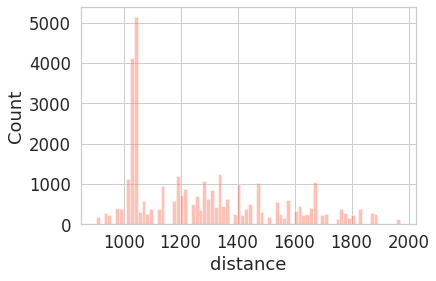

In [ ]:
import seaborn as sns

with sns.plotting_context("notebook",font_scale=1.5):
  sns.set_style("whitegrid")
  sns.distplot(X["distance"].dropna(),
                bins=80,
                kde=False,
                color="tomato")
  plt.ylabel("Count")

In [ ]:
train=data.loc[data.train_or_test.isin(['train'])]
test=data.loc[data.train_or_test.isin(['test'])]
train.drop(columns={'train_or_test'},axis=1,inplace=True)
test.drop(columns={'train_or_test'},axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
print(len(test),len(submission))

3089 3089


In [ ]:
train.month.isna().sum()

0

In [ ]:
X=train.drop(columns={'stock_distributed'})
y=train.loc[:,['stock_distributed']]
del test['stock_distributed']

In [ ]:
print(X.shape, y.shape)

(35753, 10) (35753, 1)


In [ ]:
X.head(3)

,site_code,year,month,region,district,product_code,average_monthly_consumption,site_type,lat,long
0,119,2019,1,11,0,5,18.0,1,6.730937,-3.483863
1,119,2019,1,11,0,3,2.0,1,6.730937,-3.483863
2,119,2019,1,11,0,2,9.0,1,6.730937,-3.483863


In [ ]:
test.head()

,site_code,year,month,region,district,product_code,average_monthly_consumption,site_type,lat,long
35753,119,2019,7,11,0,1,NaN,1,6.730937,-3.483863
35754,119,2019,7,11,0,5,NaN,1,6.730937,-3.483863
35755,119,2019,7,11,0,3,NaN,1,6.730937,-3.483863
35756,119,2019,7,11,0,2,NaN,1,6.730937,-3.483863
35757,119,2019,7,11,0,6,NaN,1,6.730937,-3.483863


In [ ]:
!pip install mlxtend

In [ ]:
!pip install geopy

In [ ]:
# calculate distance between the coordinates
from geopy.distance import vincenty


X['distance'] = X.apply(lambda x : vincenty(x['lat'], x['long']), axis = 1)
test['distance'] = test.apply(lambda x: vincenty(x['lat'], x['long']), axis=1)

/usr/local/lib/python3.6/dist-packages/geopy/point.py:180: UserWarning: A single number has been passed to the Point constructor. This is probably a mistake, because constructing a Point with just a latitude seems senseless. If this is exactly what was meant, then pass the zero longitude explicitly to get rid of this warning.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X.drop(columns=['lat', 'long'], axis = 1, inplace =True)
test.drop(columns=['lat','long'], axis = 1, inplace =True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X.distance = X.distance.apply(lambda x : x.kilometers)

In [ ]:
test.distance = test.distance.apply(lambda x : x.kilometers)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# Standardizing #
from sklearn.preprocessing import StandardScaler,MinMaxScaler


scaler = StandardScaler()
scaler2 = MinMaxScaler(feature_range=(0,1))


X[['distance']] = scaler.fit_transform(X[['distance']])
test[['distance']] = scaler.fit_transform(test[['distance']])

X[['month']] = scaler.fit_transform(X[['month']])
X[['year']] = scaler.fit_transform(X[['year']])

test[['month']] = scaler.fit_transform(test[['month']])
test[['year']] = scaler.fit_transform(test[['year']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [ ]:
test.fillna(0, inplace=True)

In [ ]:
X.head()

,site_code,year,month,region,district,product_code,average_monthly_consumption,site_type,distance
0,119,1.535631,-1.507543,11,0,5,0.104350,1,-0.57689
1,119,1.535631,-1.507543,11,0,3,-0.387641,1,-0.57689
2,119,1.535631,-1.507543,11,0,2,-0.172395,1,-0.57689
3,119,1.535631,-1.507543,11,0,6,-0.449140,1,-0.57689
4,119,1.535631,-1.507543,11,0,7,-0.418390,1,-0.57689


In [ ]:
test.head()

,site_code,year,month,region,district,product_code,average_monthly_consumption,site_type,distance
35753,119,0.0,-1.220987,11,0,1,0.0,1,-0.527911
35754,119,0.0,-1.220987,11,0,5,0.0,1,-0.527911
35755,119,0.0,-1.220987,11,0,3,0.0,1,-0.527911
35756,119,0.0,-1.220987,11,0,2,0.0,1,-0.527911
35757,119,0.0,-1.220987,11,0,6,0.0,1,-0.527911


In [ ]:
y.stock_distributed.isna().sum()

0

In [ ]:
y_train = y.stock_distributed.values

In [ ]:
X_train = X.values
X_test = test.values

In [ ]:
print(X_train.shape,X_test.shape)

(35753, 8) (3089, 8)


In [ ]:
X_data_train = X[['site_code'	,'year'	,'month'	,'region'	,'district'	,'product_code'	,'site_type'	,'distance']]
X_data_test = test[['site_code'	,'year'	,'month'	,'region'	,'district'	,'product_code'	,'site_type'	,'distance']]

In [ ]:
# Regression model
# Model 1 -- stacking regressor

seed = 1


from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


svr = SVR(kernel='linear')
lasso = Lasso()
rf = RandomForestRegressor(n_estimators=100, 
                           random_state=seed)

xgb_regressor = XGBRegressor(n_estimators = 100, random_state= seed)

lgbm_regressor = LGBMRegressor(n_leaves = 70, n_estimators=100, random_state=seed)

stack = StackingCVRegressor(regressors=(lgbm_regressor, xgb_regressor, svr, lasso, rf),
                            meta_regressor= lgbm_regressor,
                            cv = 5,
                            use_features_in_secondary=True)


In [ ]:
import keras
from keras.layers import *
from keras.optimizers import Adam
from keras.models import Model
from keras.initializers import glorot_normal
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.regularizers import l2
import tensorflow as tf
import random

In [ ]:
#Model two -- Attention-based regressor

def get_model():
  tf.random.set_seed(seed)
  np.random.seed(seed)
  random.seed(seed)

  input_tensor = Input(shape=(6,))

  x = Dense(4, activation='relu')(input_tensor)
  att_probas = Dense(4,activation='softmax' , name= "attention_proba_1")(x)
  x = multiply([x, att_probas])

  x = Dense(8, activation ='relu')(x)
  att_probas = Dense(8,activation='softmax' , name= "attention_proba_2")(x)
  x = multiply([x, att_probas])

  x = Dense(16, activation ='relu')(x)
  att_probas = Dense(16,activation='softmax' , name= "attention_proba_3")(x)
  x = multiply([x, att_probas])

  x = Dense(32, activation ='relu')(x)
  att_probas = Dense(32,activation='softmax' , name= "attention_proba_4")(x)
  x = multiply([x, att_probas])

  x = Dense(64, activation ='relu')(x)
  att_probas = Dense(64,activation='softmax' , name= "attention_proba_5")(x)
  x = multiply([x, att_probas])

  x = add([x, Dense(64, activation='relu')(x)])
  x = add([x, Dense(64, activation='relu')(x)])

  x = Dropout(0.5)(x)

  out = Dense(1,kernel_initializer=glorot_normal(seed=seed),
              bias_initializer=glorot_normal(seed=seed))(x)

  model = Model(inputs=input_tensor, outputs =out)

  model.compile(optimizer='rmsprop', loss="mse",metrics=[tf.keras.metrics.RootMeanSquaredError(name ='rmse')])
  return model

In [ ]:
#model 3
rf = RandomForestRegressor(n_estimators=500, max_depth=7,
                           random_state=seed)

xgb_regressor = XGBRegressor(n_estimators = 500,subsample=0.8,max_depth=7, learning_rate=0.02, base_score = np.mean(y_train), random_state= seed)

lgbm_regressor = LGBMRegressor(n_leaves = 80, n_estimators=500, max_depth=7,subsample_for_bin=300000,learning_rate=0.02, subsample=0.8, base_score=np.mean(y_train), random_state=seed)

stack2 = StackingCVRegressor(regressors=(rf,xgb_regressor,lgbm_regressor),
                            meta_regressor= xgb_regressor,
                            cv = 5,
                            use_features_in_secondary=True)

In [ ]:
# model 4 --- nn
def get_model2():
  tf.random.set_seed(seed)
  np.random.seed(seed)
  random.seed(seed)

  input_tensor = Input(shape=(6,))

  x = Dense(4, kernel_initializer = 'uniform', activation='relu')(input_tensor)
  att_probas = Dense(4,activation='softmax' , name= "attention_proba_1")(x)
  x = multiply([x, att_probas])
  x = Dropout(0.2)(x)

  x = Dense(8, kernel_initializer = 'uniform' ,activation ='relu')(x)
  att_probas = Dense(8,activation='softmax' , name= "attention_proba_2")(x)
  x = multiply([x, att_probas])

  x = Dense(16, kernel_initializer = 'uniform', activation ='relu')(x)
  att_probas = Dense(16,activation='softmax' , name= "attention_proba_3")(x)
  x = multiply([x, att_probas])
  x = Dropout(0.2)(x)

  x = Dense(32,kernel_initializer = 'uniform', activation ='relu')(x)
  att_probas = Dense(32,activation='softmax' , name= "attention_proba_4")(x)
  x = multiply([x, att_probas])

  x = Dense(64,kernel_initializer = 'uniform', activation ='relu')(x)
  att_probas = Dense(64,activation='softmax' , name= "attention_proba_5")(x)
  x = multiply([x, att_probas])
  x = Dropout(0.2)(x)

  x = add([x, Dense(64, kernel_initializer = 'uniform',activation='relu')(x)])
  x = add([x, Dense(64,kernel_initializer = 'uniform', activation='relu')(x)])

  x = Dropout(0.2)(x)

  out = Dense(1,kernel_initializer=glorot_normal(seed=seed),
              bias_initializer=glorot_normal(seed=seed))(x)

  model = Model(inputs=input_tensor, outputs =out)

  model.compile(optimizer='sgd', loss="mse",metrics=[tf.keras.metrics.RootMeanSquaredError(name ='rmse')])
  return model

In [ ]:
#Model 5 -- Attention-based regressor with label encoded year features

def get_model():
  tf.random.set_seed(seed)
  np.random.seed(seed)
  random.seed(seed)

  input_tensor = Input(shape=(6,))

  x = Dense(4, activation='relu')(input_tensor)
  att_probas = Dense(4,activation='softmax' , name= "attention_proba_1")(x)
  x = multiply([x, att_probas])

  x = Dense(8, activation ='relu')(x)
  att_probas = Dense(8,activation='softmax' , name= "attention_proba_2")(x)
  x = multiply([x, att_probas])

  x = Dense(16, activation ='relu')(x)
  att_probas = Dense(16,activation='softmax' , name= "attention_proba_3")(x)
  x = multiply([x, att_probas])

  x = Dense(32, activation ='relu')(x)
  att_probas = Dense(32,activation='softmax' , name= "attention_proba_4")(x)
  x = multiply([x, att_probas])

  x = Dense(64, activation ='relu')(x)
  att_probas = Dense(64,activation='softmax' , name= "attention_proba_5")(x)
  x = multiply([x, att_probas])

  x = add([x, Dense(64, activation='relu')(x)])
  x = add([x, Dense(64, activation='relu')(x)])

  x = Dropout(0.5)(x)

  out = Dense(1,kernel_initializer=glorot_normal(seed=seed),
              bias_initializer=glorot_normal(seed=seed))(x)

  model = Model(inputs=input_tensor, outputs =out)

  model.compile(optimizer='adam', loss="mse",metrics=[tf.keras.metrics.RootMeanSquaredError(name ='rmse')])
  return model

In [ ]:
# model 6

svr = SVR(kernel='linear')
lasso = Lasso()
rf = RandomForestRegressor(n_estimators=100, 
                           random_state=seed)

xgb_regressor = XGBRegressor(n_estimators = 100, random_state= seed)

lgbm_regressor = LGBMRegressor(n_leaves = 70, n_estimators=100, random_state=seed)

stack = StackingCVRegressor(regressors=(svr, lasso, rf,xgb_regressor,lgbm_regressor),
                            meta_regressor= lgbm_regressor,
                            cv = 5,
                            use_features_in_secondary=True)

In [ ]:
# model 7 
# with raw year features

def get_model():
  tf.random.set_seed(seed)
  np.random.seed(seed)
  random.seed(seed)

  input_tensor = Input(shape=(6,))

  x = Dense(32, kernel_initializer='uniform', activation='relu')(input_tensor)
  att_probas = Dense(32,activation='softmax' , name= "attention_proba_1")(x)
  x = multiply([x, att_probas])

  x = Dense(64, kernel_initializer='uniform', activation ='relu')(x)
  att_probas = Dense(64,activation='softmax' , name= "attention_proba_2")(x)
  x = multiply([x, att_probas])

  x = concatenate([x, Dense(64 ,kernel_initializer='uniform',activation='relu')(input_tensor)])

  x = add([x, Dense(128, activation='relu')(x)])
  x = add([x, Dense(128, activation='relu')(x)])

  x = Dropout(0.15)(x)

  out = Dense(1,kernel_initializer=glorot_normal(seed=seed),
              bias_initializer=glorot_normal(seed=seed))(x)

  model = Model(inputs= input_tensor, outputs = out)

  model.compile(optimizer='adam', loss="mse",metrics=[tf.keras.metrics.RootMeanSquaredError(name ='rmse')])
  return model


In [ ]:
# model 8
# with raw year features
# minmax scaling/standard scaling
# with/no early stopping
# additional dropouts
# batch 1024


# Note : Standard scaling performed better than minmax scaling

import keras
from keras.layers import *
from keras.optimizers import Adam
from keras.models import Model
from keras.initializers import glorot_normal
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.regularizers import l2
import tensorflow as tf
import random


def get_model():
  tf.random.set_seed(seed)
  np.random.seed(seed)
  random.seed(seed)

  input_tensor = Input(shape=(6,))

  x = Dense(32, kernel_initializer='uniform', activation='relu')(input_tensor)
  att_probas = Dense(32,activation='softmax' , name= "attention_proba_1")(x)
  x = multiply([x, att_probas])
  x = Dropout(0.2)(x)

  x = Dense(64, kernel_initializer='uniform', activation ='relu')(x)
  att_probas = Dense(64,activation='softmax' , name= "attention_proba_2")(x)
  x = multiply([x, att_probas])
  x = Dropout(0.2)(x)

  x = concatenate([x, Dense(64 ,kernel_initializer='uniform',activation='relu')(input_tensor)])

  x = add([x, Dense(128, activation='relu')(x)])
  x = add([x, Dense(128, activation='relu')(x)])

  x = Dropout(0.15)(x)

  out = Dense(1,kernel_initializer=glorot_normal(seed=seed),
              bias_initializer=glorot_normal(seed=seed))(x)

  model = Model(inputs= input_tensor, outputs = out)

  model.compile(optimizer='adam', loss="mse",metrics=[tf.keras.metrics.RootMeanSquaredError(name ='rmse')])
  return model


In [ ]:
%%time
import lightgbm as lgb

np.random.seed(seed)

train_data = lgb.Dataset(X_train , label = y_train)

CPU times: user 135 µs, sys: 27 µs, total: 162 µs
Wall time: 168 µs


In [ ]:
params = {
        "objective" : "tweedie",
        "metric" :"rmse",
        "force_row_wise" : True,
        "learning_rate" : 0.075,
#         "sub_feature" : 0.8,
        "sub_row" : 0.75,
        "bagging_freq" : 1,
        "lambda_l2" : 0.1,
#         "nthread" : 4
        "metric": ["rmse"],
    'verbosity': 1,
    'num_iterations' : 1200,
    'num_leaves': 128,
    "min_data_in_leaf": 100,
}

In [ ]:
m_lgb = lgb.train(params, train_data, verbose_eval=20) 

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [ ]:
from keras import backend as K

def attention_3d_block(inputs, name):
  # inputs.shape = (batch_size, time_steps, input_dim)
  TIME_STEPS = inputs.shape[1]
  SINGLE_ATTENTION_VECTOR = False
  
  input_dim = inputs.shape[2]
  a = Permute((2, 1))(inputs)
  a = Dense(TIME_STEPS, activation='softmax')(a)
  if SINGLE_ATTENTION_VECTOR:  
    a = Lambda(lambda x: K.mean(x, axis=1))(a)
    a = RepeatVector(input_dim)(a)
  a_probs = Permute((2, 1), name=name)(a)
  output_attention_mul = Multiply()([inputs, a_probs])
  return output_attention_mul

In [ ]:
# reshaping input
x = X_train.reshape(X_train.shape[0], 1,X_train.shape[1]); xtest = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [ ]:
#model10 1- 3,4,5
#model 10 2 - 5,4,3 
def get_model_cnn():
  tf.random.set_seed(1)
  np.random.seed(1)
  random.seed(1)

  input_tensor = Input(shape=(1,8))

  x = Conv1D(64, 5,strides=2,padding='same',activation='relu')(input_tensor)
  x = attention_3d_block(x, 'attention_vec_1')
  x = Dropout(0.15)(x)

  x = Conv1D(128, 4,strides=2,padding='same',activation='relu')(x)
  x = attention_3d_block(x, 'attention_vec_2')
  x = Dropout(0.15)(x)

  x = Conv1D(256, 3,strides=2,padding='same',activation='relu')(x)
  x = attention_3d_block(x, 'attention_vec_3')
  x = Dropout(0.15)(x)

  x_max = GlobalMaxPooling1D()(x)

  x_avg = GlobalAveragePooling1D()(x)

  x = concatenate([x_max, x_avg])

  x = add([x, Dense(512, activation='relu')(x)])
  x = add([x, Dense(512, activation='relu')(x)])
  
  x = Dropout(0.15)(x)

  out = Dense(1,kernel_initializer=glorot_normal(seed=1),
              bias_initializer=glorot_normal(seed=1))(x)

  model = Model(inputs=input_tensor,outputs =out)

  model.compile(optimizer='adam', loss="mse",metrics=[tf.keras.metrics.RootMeanSquaredError(name ='rmse')])
  return model


In [ ]:
# model 11

import keras
from keras.layers import *
from keras.optimizers import Adam
from keras.models import Model
from keras.initializers import glorot_normal
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.regularizers import l2
import tensorflow as tf
import random


def get_model_11():
  tf.random.set_seed(seed)
  np.random.seed(seed)
  random.seed(seed)

  input_tensor = Input(shape=(X_data_train.shape[1],))
  avg = Input(shape=(X_avg_train.shape[1],))

  x = Dense(32, kernel_initializer='uniform', activation='relu')(input_tensor)
  att_probas = Dense(32,activation='softmax' , name= "attention_proba_1")(x)
  x = multiply([x, att_probas])
  x = Dropout(0.2)(x)

  x = Dense(64, kernel_initializer='uniform', activation ='relu')(x)
  att_probas = Dense(64,activation='softmax' , name= "attention_proba_2")(x)
  x = multiply([x, att_probas])
  x = Dropout(0.2)(x)

  x = Dense(128, kernel_initializer='uniform', activation ='relu')(x)
  att_probas = Dense(128,activation='softmax' , name= "attention_proba_3")(x)
  x = multiply([x, att_probas])
  x = Dropout(0.2)(x)


  x = concatenate([x, Dense(128,kernel_initializer='uniform',activation='relu')(avg)])

  x = add([x, Dense(256, activation='relu')(x)])
  x = add([x, Dense(256, activation='relu')(x)])

  x = Dropout(0.15)(x)

  out = Dense(1,kernel_initializer=glorot_normal(seed=seed),
              bias_initializer=glorot_normal(seed=seed))(x)

  model = Model(inputs= [input_tensor,avg], outputs = out)

  model.compile(optimizer='adam', loss="mse",metrics=[tf.keras.metrics.RootMeanSquaredError(name ='rmse')])
  return model


In [ ]:
!pip install catboost

In [205]:
# neural network in stacking regressor

seed = 1

from catboost import CatBoostRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


model = CatBoostRegressor(random_seed=seed)

svr = SVR(kernel='linear')
lasso = Lasso(random_state=seed)
ridge = Ridge(random_state = seed)
rf = RandomForestRegressor(n_estimators=500, 
                           random_state=seed)

xgb_regressor = XGBRegressor(n_estimators = 500, random_state= seed)

lgbm_regressor = LGBMRegressor(n_leaves = 80, n_estimators= 500, random_state=seed)

## hidden layer sizes -- 64,128,256,512,256,128,64

mlp = MLPRegressor(
    hidden_layer_sizes=(64,128,256,512,256,128,64),
    activation='relu',
    random_state = seed,
    max_iter = 1000,
    early_stopping = True,
    validation_fraction = 0.2,
    batch_size = 1024,
    learning_rate = 'adaptive'
)

stack = StackingCVRegressor(regressors=(mlp, model, lgbm_regressor, xgb_regressor, lasso, svr,rf),
                            meta_regressor= model,
                            cv = 5,
                            use_features_in_secondary=True)

Training Phase

In [ ]:
from sklearn.model_selection import StratifiedKFold


es = EarlyStopping(monitor ="val_loss", mode ="min", verbose =1, patience = 50)

kfold = StratifiedKFold(n_splits = 5,shuffle = True, random_state =seed)

predictions = list()

for fold, (train_idx,test_idx) in enumerate(kfold.split(X_data_train,y_train)):

  model = get_model_11()

  print('########### Fold {} ############'.format(fold+1))

  print(model.summary())
  
  model.fit(
      [X_data_train[train_idx],X_avg_train[train_idx]],
      y_train[train_idx],
      validation_data = ([X_data_train[test_idx],X_avg_train[test_idx]] ,y_train[test_idx]),
      callbacks = [es],
      epochs = 1000,
      batch_size = 1024
  )
  preds = model.predict([X_data_test,X_avg_test], batch_size =1024, verbose = 1)
  predictions.append(preds)

In [ ]:
preds = np.average(predictions, axis = 0)

In [ ]:
%%time
preds = model.fit(X,y_train,cat_features=cat_features).predict(test)

In [210]:
preds.shape

(3089,)

In [ ]:
preds = np.squeeze(preds)

In [ ]:
### to ensemble -- ensemble_3_nns
sub1 = pd.read_csv('model_7_raw_year_features.csv'); sub2 = pd.read_csv('nn9_cnn.csv');
sub3 = pd.read_csv('standard_scaling_with_additional_dropouts.csv')

In [ ]:
sub1['prediction'] = 0.15*sub1['prediction'] + 0.25*sub2['prediction'] + 0.6*sub3['prediction']

In [211]:
submission['prediction']=np.abs(preds)

In [212]:
submission.to_csv('catboost.csv', index =False)
#sub1.to_csv('ensemble_stack_nn3_stack3_with_encoded_year_features_correct.csv',index=False)

In [ ]:
submission.head()

In [ ]:
from google.colab import files

files.download('catboost.csv')